# What makes a winner

### Inferential statistics

group comparisons (grouped boxplots/violin, group means ± error bars, effect size estimates (cohen's d if comparing two groups)

Correlation & Association Analysis
Look for relationships between indicators:

Pearson correlation for continuous, linear relationships

Spearman’s rank for monotonic but non-linear relationships

Cross-tabulation + Chi-square tests for categorical variables

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [45]:
df = pd.read_csv("data/cleaned/summary_indicators.csv")
df

,team_id,win,points_scored,score_attempts,score_efficiency,disc_possession,pass_acc,f_turnover,uf_turnover,total_turnover,subs,early_win,avg_passes_per_score,pass_rate,avg_poss
0,01_teamA,1,15,18,0.833333,53.940355,94.832827,10,5,15,17,1,14.733333,6.460904,101.843333
1,01_teamB,0,14,21,0.666667,37.548564,87.394958,7,8,15,16,1,3.285714,3.357104,73.339069
2,02_teamA,1,15,17,0.882353,60.030008,96.078431,3,7,10,16,1,9.733333,5.003817,122.306640
3,02_teamB,0,7,15,0.466667,25.153338,88.194444,6,11,17,16,1,6.285714,6.743673,53.383375
4,03_teamA,0,14,18,0.777778,45.305802,90.960452,8,8,16,15,1,4.142857,4.300699,82.312200
5,03_teamB,1,15,21,0.714286,49.602738,91.584158,11,5,16,16,1,6.600000,4.482965,87.211871
6,04_teamA,0,13,16,0.812500,49.094675,95.454545,7,4,11,15,1,8.846154,5.759619,105.041667
7,04_teamB,1,15,19,0.789474,43.565283,92.957746,6,4,10,13,1,5.866667,3.808558,89.482680
8,05_teamA,0,11,18,0.611111,35.879055,89.805825,9,12,21,16,1,7.818182,5.856338,65.954188
9,05_teamB,1,15,18,0.833333,52.858048,95.502646,4,13,17,14,1,14.866667,7.294249,97.165594


`Emma`: do a Shapiro–Wilk test to test for normal distribution of the differences between the two teams. Also make graphs (histogram or Q-Q plot).

*The Shapiro-Wilk test is generally preferred for smaller sample sizes (n < 50), while the Kolmogorov-Smirnov test is more appropriate for larger samples (n >= 50)*

*Shapiro-Wilk Test: This test assesses the null hypothesis that the sample data comes from a normal distribution. A low p-value suggests that the data deviates significantly from a normal distribution.* `Emma`: so non-significance signifies that it is normally distributed.

Indicators that have normally distributed data (paired sample t-test):
- all.

Indicators that do not have normally distributed data (Wilcoxon signed-rank test for paired samples):
- none.

In [46]:
# List of indicator column names to analyze
indicators = [
    "score_attempts", "score_efficiency", "disc_possession",
    "pass_acc", "f_turnover", "uf_turnover", "total_turnover",
    "subs", "early_win", "avg_passes_per_score", "pass_rate", "avg_poss"
]

df_norm = df.copy()

df_norm['game_id'] = df_norm['team_id'].apply(lambda x: x.split('_')[0])
df_norm['team'] = df_norm['team_id'].apply(lambda x: x.split('_')[1])

# Pivot the DataFrame to create side-by-side comparison
pivot_df = df_norm.pivot(index='game_id', columns='team', values=indicators)

# Extract values for teamA and teamB using .xs() across the second level of MultiIndex columns
teamA_df = pivot_df.xs('teamA', axis=1, level=1)
teamB_df = pivot_df.xs('teamB', axis=1, level=1)

# Calculate the differences: teamA - teamB
diff_df = teamA_df - teamB_df

# Now diff_df contains the indicator differences between teamA and teamB
print(diff_df.head())

         score_attempts  score_efficiency  disc_possession  pass_acc  \
game_id                                                                
01                 -3.0          0.166667        16.391791  7.437869   
02                  2.0          0.415686        34.876670  7.883987   
03                 -3.0          0.063492        -4.296937 -0.623706   
04                 -3.0          0.023026         5.529392  2.496799   
05                  0.0         -0.222222       -16.978994 -5.696820   

         f_turnover  uf_turnover  total_turnover  subs  early_win  \
game_id                                                             
01              3.0         -3.0             0.0   1.0        0.0   
02             -3.0         -4.0            -7.0   0.0        0.0   
03             -3.0          3.0             0.0  -1.0        0.0   
04              1.0          0.0             1.0   2.0        0.0   
05              5.0         -1.0             4.0   2.0        0.0   

         av

In [ ]:
# shapiro wilk on differences distribution:
for col in diff_df:
    data = diff_df[col].dropna()  # Drop NaNs, as Shapiro-Wilk does not accept them
    stat, p_value = stats.shapiro(data)
    if p_value > 0.05:
        print(f"Column: {col} | W-Statistic: {stat:.4f} | p-value: {p_value:.4f} | All good.")
    else:
        print(f"Column: {col} | W-Statistic: {stat:.4f} | p-value: {p_value:.4f} | Oh oh.")

Column: score_attempts | W-Statistic: 0.9535 | p-value: 0.6889 | All good.
Column: score_efficiency | W-Statistic: 0.9195 | p-value: 0.2819 | All good.
Column: disc_possession | W-Statistic: 0.9707 | p-value: 0.9179 | All good.
Column: pass_acc | W-Statistic: 0.9506 | p-value: 0.6452 | All good.
Column: f_turnover | W-Statistic: 0.9091 | p-value: 0.2078 | All good.
Column: uf_turnover | W-Statistic: 0.9075 | p-value: 0.1983 | All good.
Column: total_turnover | W-Statistic: 0.9753 | p-value: 0.9575 | All good.
Column: subs | W-Statistic: 0.9728 | p-value: 0.9376 | All good.
Column: early_win | W-Statistic: 1.0000 | p-value: 1.0000 | All good.
Column: avg_passes_per_score | W-Statistic: 0.9554 | p-value: 0.7172 | All good.
Column: pass_rate | W-Statistic: 0.9609 | p-value: 0.7962 | All good.
Column: avg_poss | W-Statistic: 0.9777 | p-value: 0.9730 | All good.


/var/folders/7n/bd65vv5n0xj0p8tjzcz0k6_80000gn/T/ipykernel_8874/2351775619.py:4: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  stat, p_value = stats.shapiro(data)


In [ ]:
# shapiro wilk on data distribution (so wrongly used):
indicators = df.iloc[:, 3:]

for col in indicators:
    data = df[col].dropna()  # Drop NaNs, as Shapiro-Wilk does not accept them
    stat, p_value = stats.shapiro(data)
    if p_value > 0.05:
        print(f"Column: {col} | W-Statistic: {stat:.4f} | p-value: {p_value:.4f} | All good.")
    else:
        print(f"Column: {col} | W-Statistic: {stat:.4f} | p-value: {p_value:.4f} | Oh oh.")

Column: score_attempts | W-Statistic: 0.9792 | p-value: 0.8816 | All good.
Column: score_efficiency | W-Statistic: 0.9523 | p-value: 0.3030 | All good.
Column: disc_possession | W-Statistic: 0.9842 | p-value: 0.9584 | All good.
Column: pass_acc | W-Statistic: 0.9493 | p-value: 0.2616 | All good.
Column: f_turnover | W-Statistic: 0.9455 | p-value: 0.2158 | All good.
Column: uf_turnover | W-Statistic: 0.9467 | p-value: 0.2291 | All good.
Column: total_turnover | W-Statistic: 0.9475 | p-value: 0.2387 | All good.
Column: subs | W-Statistic: 0.9212 | p-value: 0.0620 | All good.
Column: early_win | W-Statistic: 0.6294 | p-value: 0.0000 | Oh oh.
Column: avg_passes_per_score | W-Statistic: 0.8610 | p-value: 0.0035 | Oh oh.
Column: pass_rate | W-Statistic: 0.9651 | p-value: 0.5489 | All good.
Column: avg_poss | W-Statistic: 0.9796 | p-value: 0.8878 | All good.


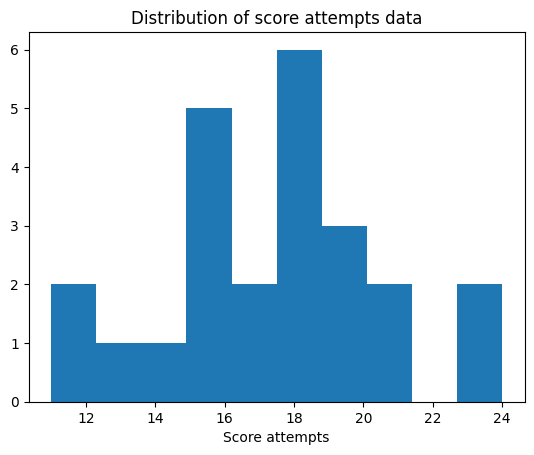

In [23]:
x = df['score_attempts']

plt.hist(x)
# plt.plot(y, x)
plt.xlabel('Score attempts')
# plt.ylabel('Number of games')
plt.title('Distribution of score attempts data')
plt.show()

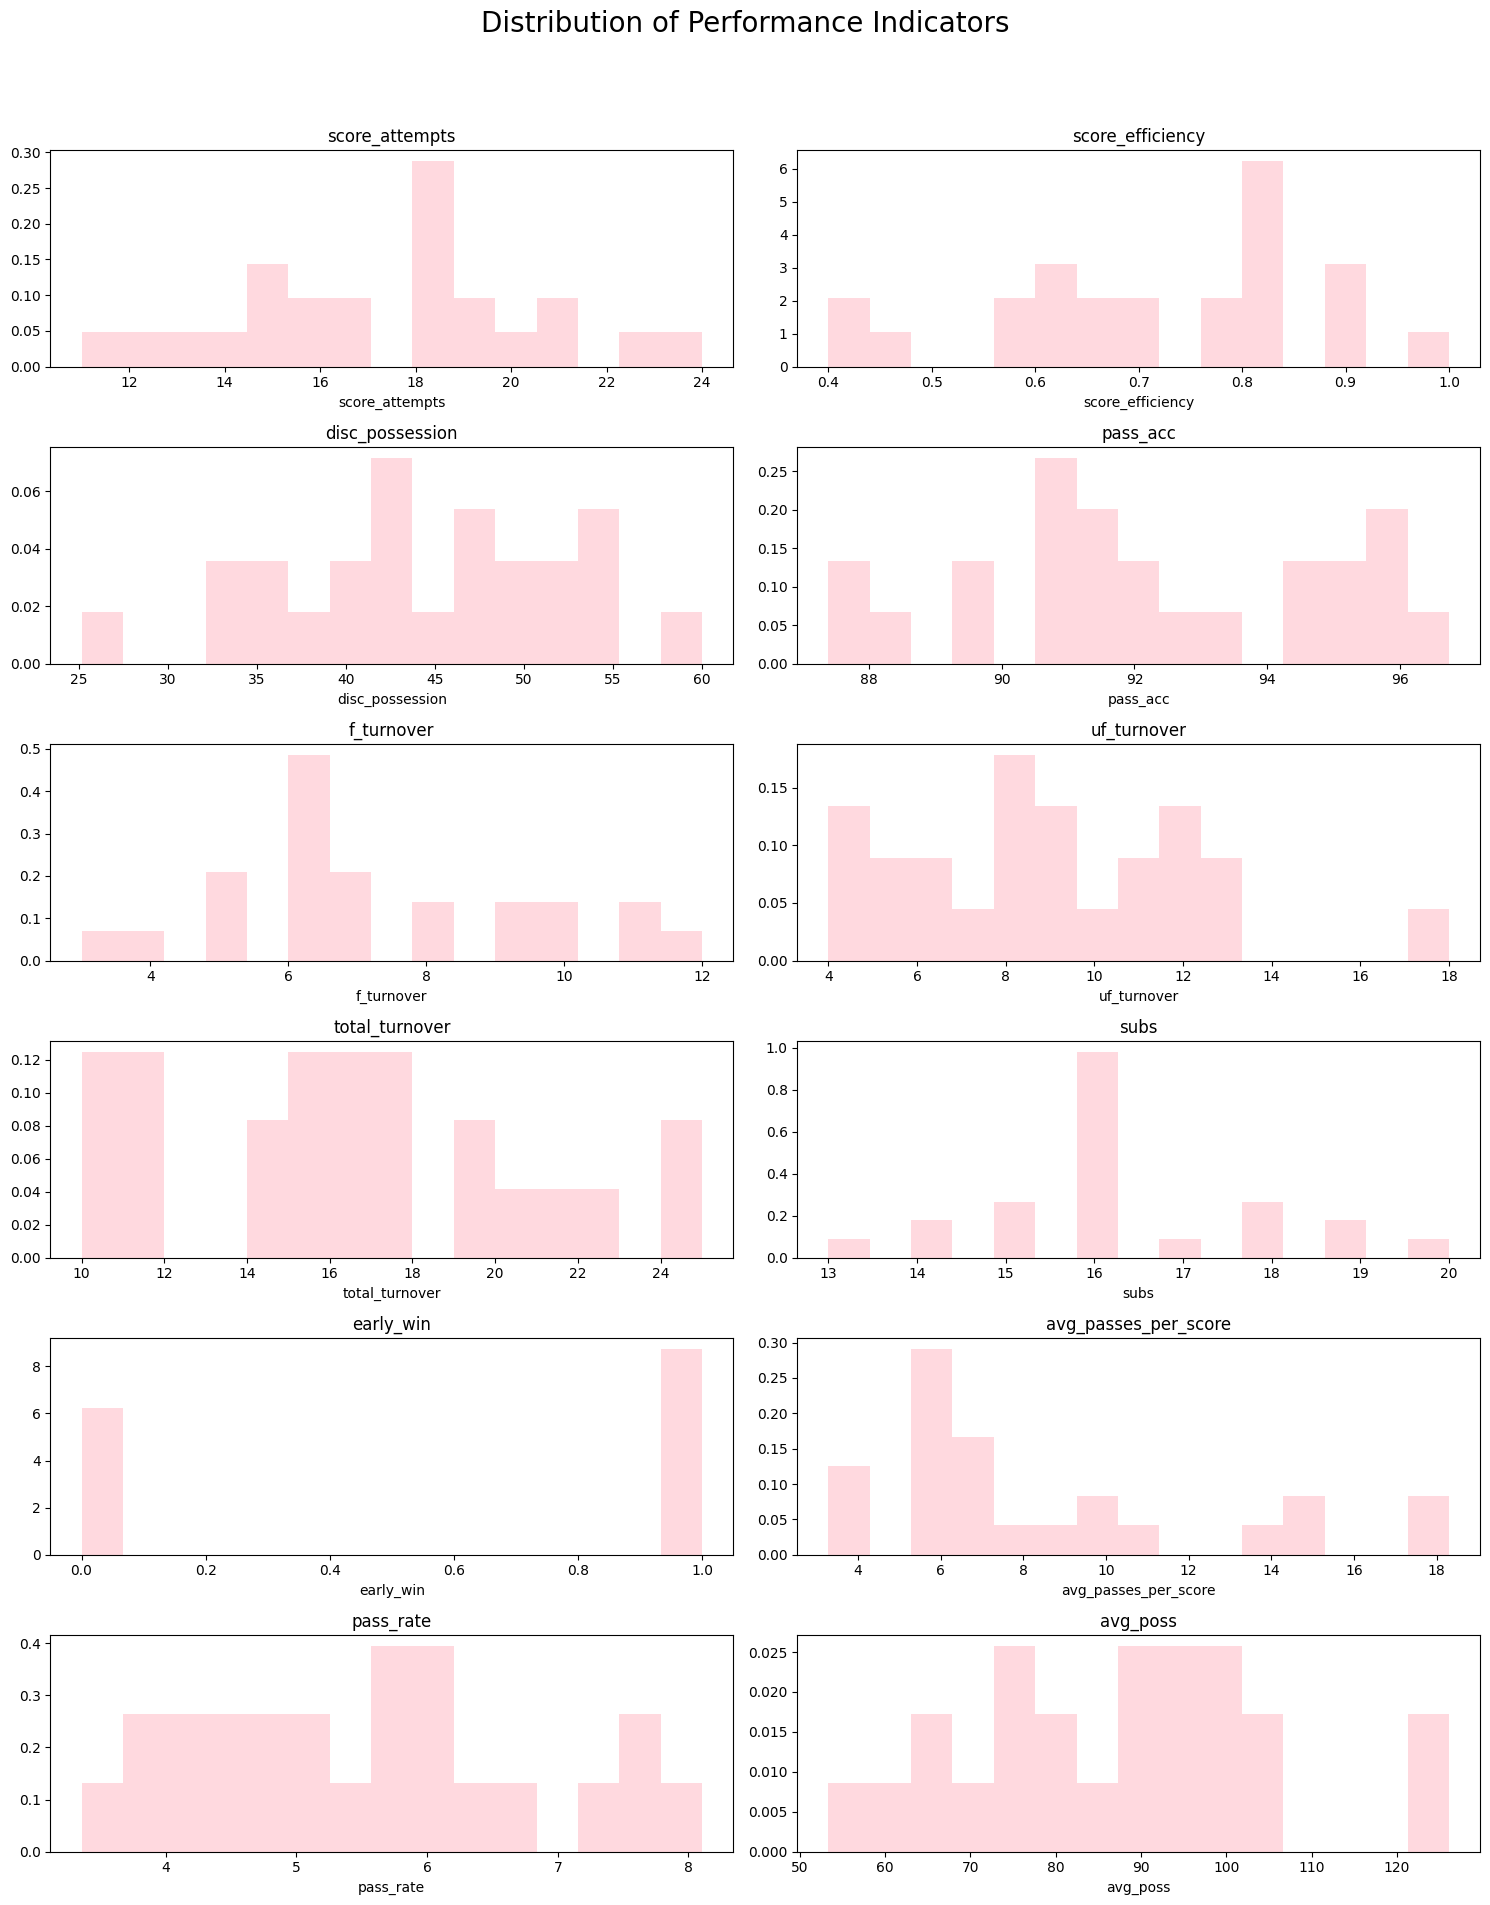

In [25]:
fig, axes = plt.subplots(6, 2, figsize=(15, 20))
fig.suptitle("Distribution of Performance Indicators", fontsize=20)

# Flatten axes array for easy indexing
axes = axes.flatten()

for idx, indicator in enumerate(indicators):
    ax = axes[idx]
    
    # Plot histogram of the indicator's data
    ax.hist(df[indicator].dropna(), color='pink', bins=15, alpha=0.6, density=True)
    
    ax.set_title(f"{indicator}")
    ax.set_xlabel(indicator)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Space for suptitle
plt.show()

#### Group comparisons

In [5]:
winners = df[df['win'] == 1]
losers = df[df['win'] == 0]

winners

,team_id,win,points_scored,score_attempts,score_efficiency,disc_possession,pass_acc,f_turnover,uf_turnover,total_turnover,subs,early_win,avg_passes_per_score,pass_rate,avg_poss
0,01_teamA,1,15,18,0.833333,53.940355,94.832827,10,5,15,17,1,14.733333,6.460904,101.843333
2,02_teamA,1,15,17,0.882353,60.030008,96.078431,3,7,10,16,1,9.733333,5.003817,122.306640
5,03_teamB,1,15,21,0.714286,49.602738,91.584158,11,5,16,16,1,6.600000,4.482965,87.211871
7,04_teamB,1,15,19,0.789474,43.565283,92.957746,6,4,10,13,1,5.866667,3.808558,89.482680
9,05_teamB,1,15,18,0.833333,52.858048,95.502646,4,13,17,14,1,14.866667,7.294249,97.165594
10,06_teamA,1,15,24,0.625000,53.409651,92.165899,6,11,17,18,0,6.600000,4.248055,95.779125
12,07_teamA,1,15,15,1.000000,51.628469,95.564516,5,6,11,16,1,9.533333,6.148171,93.085846
14,08_teamA,1,11,19,0.578947,47.318563,91.240876,6,18,24,16,0,10.545455,5.337489,88.002857
17,09_teamB,1,15,17,0.882353,32.266921,90.683230,6,9,15,14,1,5.600000,4.404989,73.098933
19,10_teamB,1,15,23,0.652174,47.908811,91.666667,5,9,14,20,0,6.266667,4.840022,71.815000


In [6]:
# List of data
sc_at = [winners['score_attempts'], losers['score_attempts']]
sc_ef = [winners['score_efficiency'], losers['score_efficiency']]
di_po = [winners['disc_possession'], losers['disc_possession']]
pa_ac = [winners['pass_acc'], losers['pass_acc']]
av_pa = [winners['avg_passes_per_score'], losers['avg_passes_per_score']]
pa_ra = [winners['pass_rate'], losers['pass_rate']]
av_po = [winners['avg_poss'], losers['avg_poss']]
fo_to = [winners['f_turnover'], losers['f_turnover']]
uf_to = [winners['uf_turnover'], losers['uf_turnover']]
to_to = [winners['total_turnover'], losers['total_turnover']]
subs = [winners['subs'], losers['subs']]

data_list = [sc_at, sc_ef, di_po, pa_ac, av_pa, pa_ra, av_po, fo_to, uf_to, to_to, subs]
titles = [
    'Score attempts', 'Score efficiency', 'Disc possession',
    'Pass accuracy', 'Possession efficiency',
    'Passing rate', 'Possession duration',
    'Forced turnovers', 'Unforced turnovers',
    'Total turnovers', 'Subs'
]

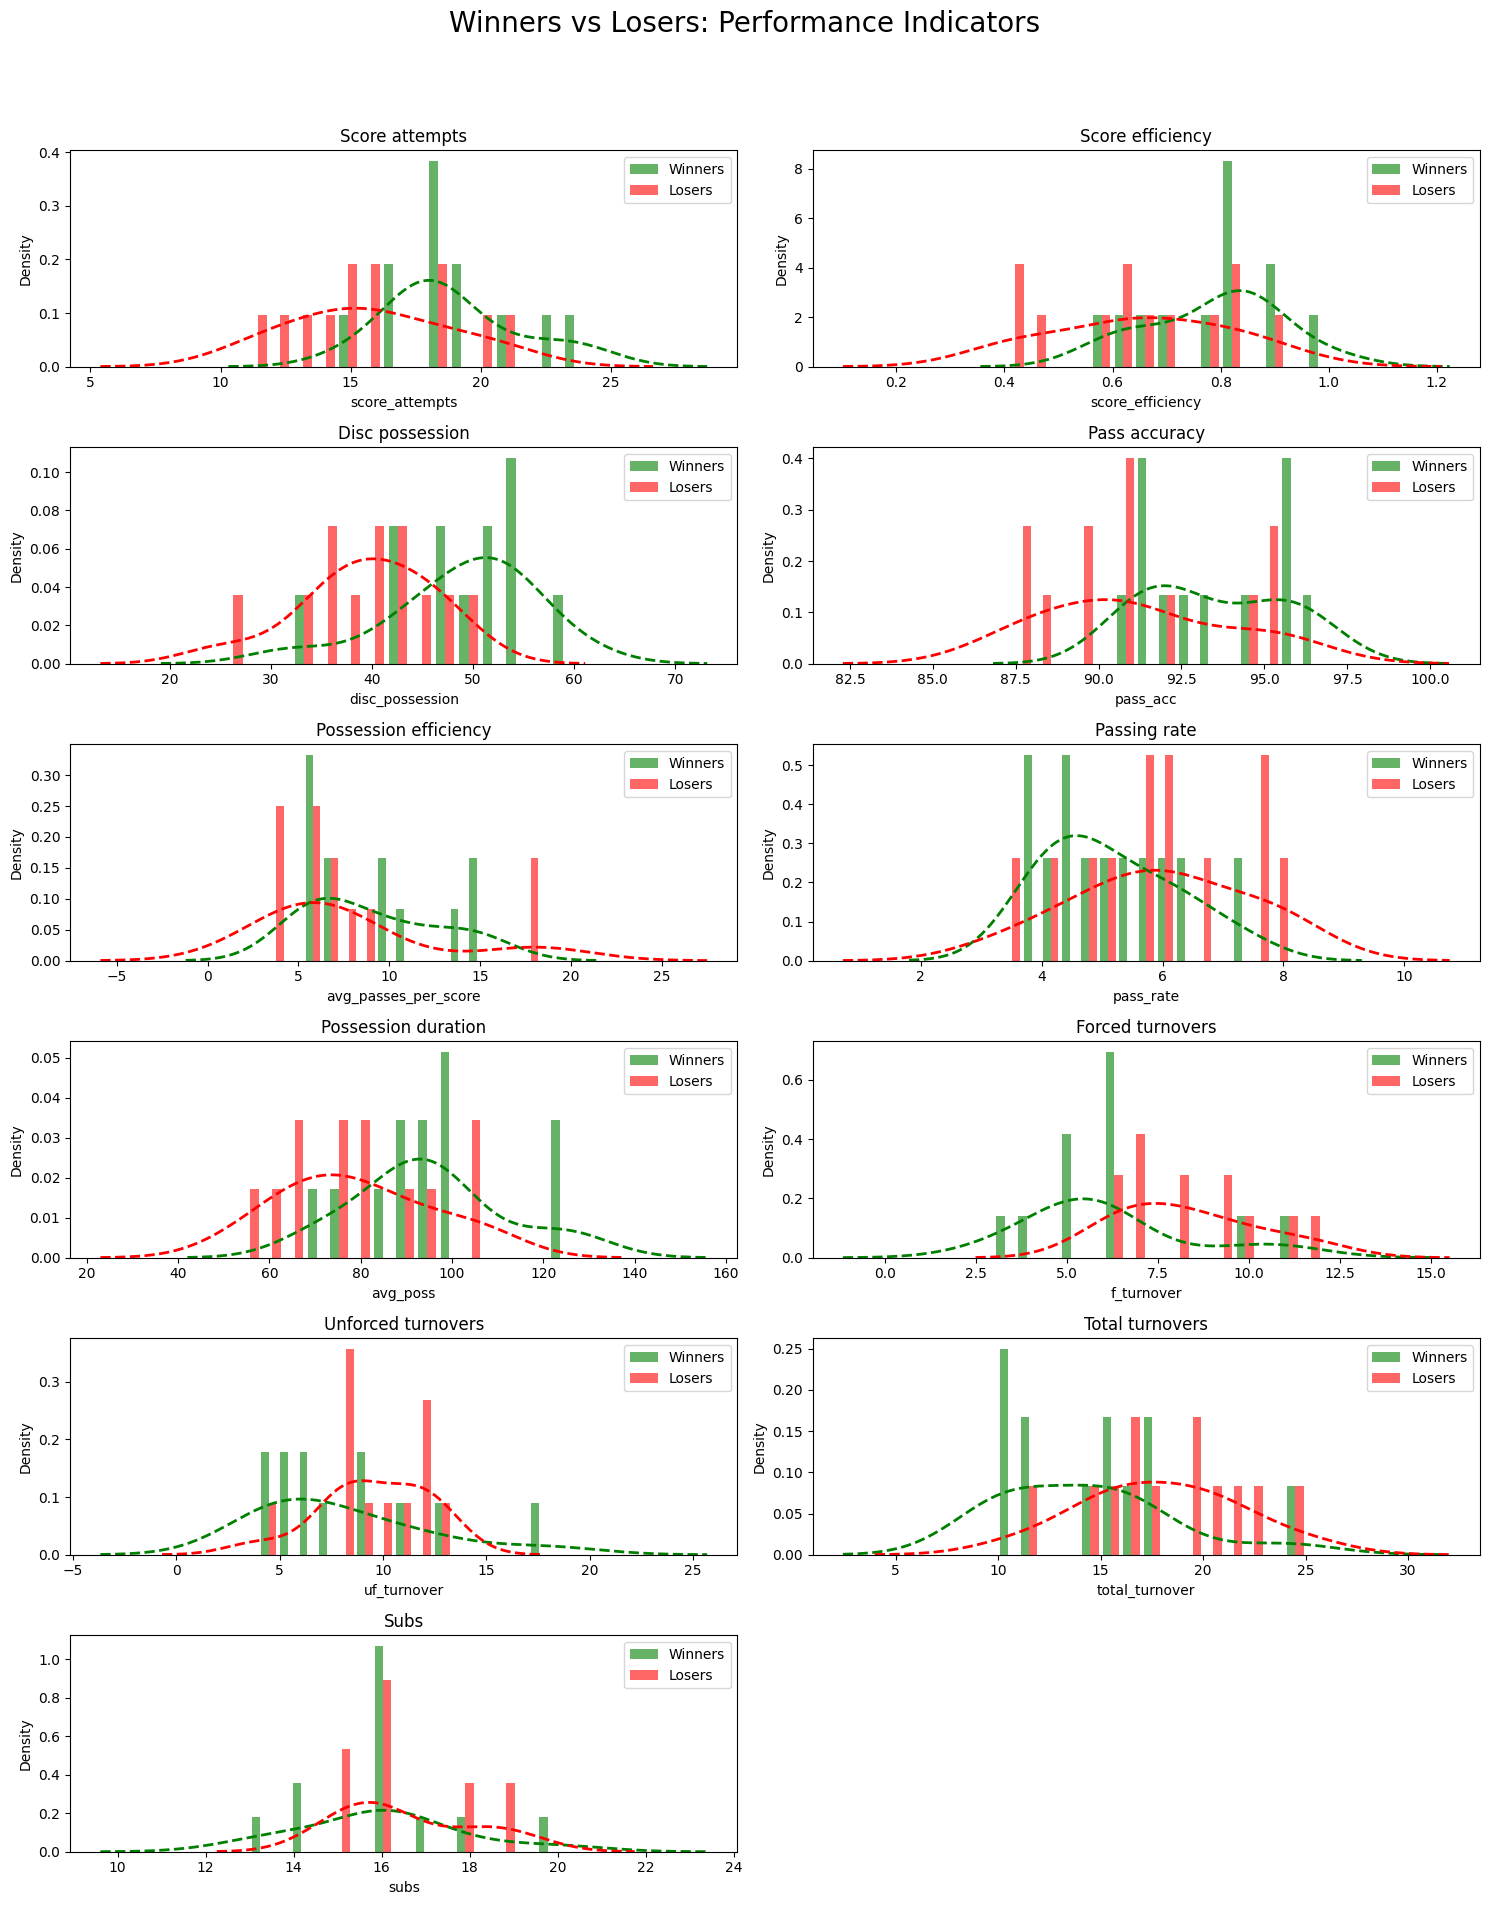

In [7]:
fig, axes = plt.subplots(6, 2, figsize=(15, 20))
fig.suptitle("Winners vs Losers: Performance Indicators", fontsize=20)

for i, (data, title) in enumerate(zip(data_list, titles)):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    
    # Plot histogram for each group with transparency
    ax.hist(data, label=['Winners', 'Losers'], color=['green', 'red'], bins=15, alpha=0.6, density=True)

    # Add KDE line using seaborn
    sns.kdeplot(data[0], ax=ax, color='green', linestyle='--', linewidth=2)
    sns.kdeplot(data[1], ax=ax, color='red', linestyle='--', linewidth=2)
    
    ax.set_title(f"{title}")
    ax.legend()

# Hide empty subplot (if 11 plots in 6x2 grid)
axes[5, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # So title doesn't overlap
plt.show()


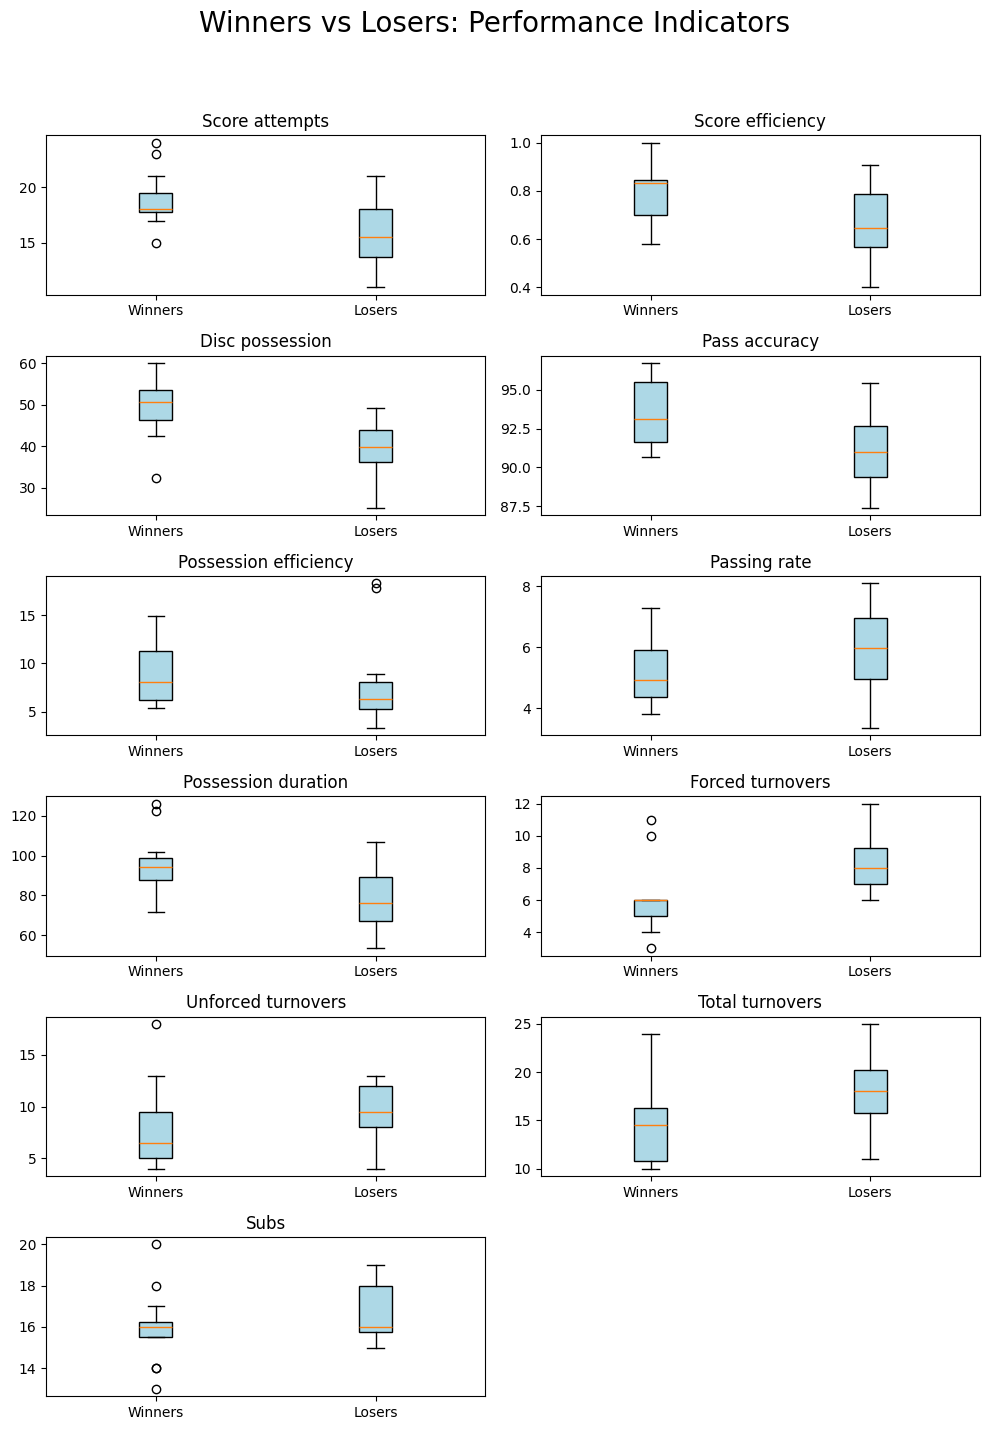

In [8]:
fig, axes = plt.subplots(6, 2, figsize=(10, 15))
fig.suptitle("Winners vs Losers: Performance Indicators", fontsize=20)

for i, (data, title) in enumerate(zip(data_list, titles)):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    
    # Plot boxplot
    ax.boxplot(data, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax.set_xticklabels(['Winners', 'Losers'])
    ax.set_title(f"{title}")

# Hide empty subplot (if 11 plots in 6x2 grid)
axes[5, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # So title doesn't overlap
plt.show()

In [9]:
# List of data
sc_at = [winners['score_attempts'], losers['score_attempts']]
sc_ef = [winners['score_efficiency'], losers['score_efficiency']]
di_po = [winners['disc_possession'], losers['disc_possession']]
pa_ac = [winners['pass_acc'], losers['pass_acc']]
av_pa = [winners['avg_passes_per_score'], losers['avg_passes_per_score']]
pa_ra = [winners['pass_rate'], losers['pass_rate']]
av_po = [winners['avg_poss'], losers['avg_poss']]
fo_to = [winners['f_turnover'], losers['f_turnover']]
uf_to = [winners['uf_turnover'], losers['uf_turnover']]
to_to = [winners['total_turnover'], losers['total_turnover']]
subs = [winners['subs'], losers['subs']]

data_list = [sc_at, sc_ef, di_po, pa_ac, av_pa, pa_ra, av_po, fo_to, uf_to, to_to, subs]
titles = [
    'Score attempts', 'Score efficiency', 'Disc possession',
    'Pass accuracy', 'Possession efficiency',
    'Passing rate', 'Possession duration',
    'Forced turnovers', 'Unforced turnovers',
    'Total turnovers', 'Subs'
]

In [30]:
winners_data = [winners['score_attempts'], winners['score_efficiency'], winners['disc_possession'],
    winners['pass_acc'], winners['avg_passes_per_score'], winners['pass_rate'],
    winners['avg_poss'], winners['f_turnover'], winners['uf_turnover'], winners['total_turnover'],
    winners['subs']]

losers_data = [losers['score_attempts'], losers['score_efficiency'], losers['disc_possession'],
    losers['pass_acc'], losers['avg_passes_per_score'], losers['pass_rate'],
    losers['avg_poss'], losers['f_turnover'], losers['uf_turnover'], losers['total_turnover'],
    losers['subs']]

titles = [
    'Score attempts', 'Score efficiency', 'Disc possession',
    'Pass accuracy', 'Possession efficiency',
    'Passing rate', 'Possession duration',
    'Forced turnovers', 'Unforced turnovers',
    'Total turnovers', 'Subs'
]

In [31]:
for i, (w_data, l_data) in enumerate(zip(winners_data, losers_data)):
    t_stat, p_val = stats.ttest_ind(w_data, l_data)
    print(f"{titles[i]}: t={t_stat:.3f}, p={p_val:.4f}")

Score attempts: t=2.733, p=0.0121
Score efficiency: t=2.307, p=0.0309
Disc possession: t=3.418, p=0.0025
Pass accuracy: t=2.357, p=0.0278
Possession efficiency: t=0.698, p=0.4927
Passing rate: t=-1.580, p=0.1284
Possession duration: t=2.409, p=0.0248
Forced turnovers: t=-2.617, p=0.0157
Unforced turnovers: t=-1.053, p=0.3038
Total turnovers: t=-2.294, p=0.0317
Subs: t=-0.845, p=0.4072


#### Point difference comparisons